In [47]:
# Load libraries
import pandas as pd
%run functions.ipynb
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sn


In [59]:
# Load data
directory = '/mnt/c/Users/jwnha/Documents/_School/MSDS/2022 Winter/Machine Learning/Week 1/ML-week1-assignment/'
train = pd.read_csv(directory + 'data/train.csv')

In [28]:
# Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [60]:
# Investigate missing data

In [61]:
print(len(train))
#train.info()

# Determine how many NAN values each observation has
train['n_na'] = 0
for i in range(0, len(train)):
    train.loc[i, 'n_na'] = train.loc[i, :].isnull().sum()

print("Value Counts of the # of NAN's in an observation")
print(train['n_na'].value_counts().sort_values(ascending=False))

"""
There are 1460 observations that have 81 features. There is a consistent number of observations missing data in varaibles related to each other. For
example, the features related to basements are missing values for 37 observations (and 36 in one of the features). All observations are missing at 
least 1 value with the vast majority (87%) missing 3-4 values. These 3-4 features missing for an observation are likely to be Alley, FireplaceQu, 
PoolQC, Fence, and MiscFeature.
The following features have missing data:
    LotFrontage    1201 non-null
    Alley          91 non-null
    MasVnrType     1452 non-null
    MasVnrArea     1452 non-null
    BsmtQual       1423 non-null
    BsmtCond       1423 non-null
    BsmtExposure   1422 non-null
    BsmtFinType1   1423 non-null
    BsmtFinType2   1422 non-null
    Electrical     1459 non-null
    FireplaceQu    770 non-null
    GarageType     1379 non-null
    GarageYrBlt    1379 non-null
    GarageFinish   1379 non-null
    GarageQual     1379 non-null
    GarageCond     1379 non-null
    PoolQC         7 non-null
    Fence          281 non-null
    MiscFeature    54 non-null
"""

1460
Value Counts of the # of NAN's in an observation
4     635
5     501
3     132
10     60
6      58
9      32
2      16
11      7
8       5
7       5
15      4
14      3
1       2
Name: n_na, dtype: int64


'\nThere are 1460 observations that have 81 features. There is a consistent number of observations missing data in varaibles related to each other. For\nexample, the features related to basements are missing values for 37 observations (and 36 in one of the features). All observations are missing at \nleast 1 value with the vast majority (87%) missing 3-4 values. These 3-4 features missing for an observation are likely to be Alley, FireplaceQu, \nPoolQC, Fence, and MiscFeature.\nThe following features have missing data:\n    LotFrontage    1201 non-null\n    Alley          91 non-null\n    MasVnrType     1452 non-null\n    MasVnrArea     1452 non-null\n    BsmtQual       1423 non-null\n    BsmtCond       1423 non-null\n    BsmtExposure   1422 non-null\n    BsmtFinType1   1423 non-null\n    BsmtFinType2   1422 non-null\n    Electrical     1459 non-null\n    FireplaceQu    770 non-null\n    GarageType     1379 non-null\n    GarageYrBlt    1379 non-null\n    GarageFinish   1379 non-null\n 

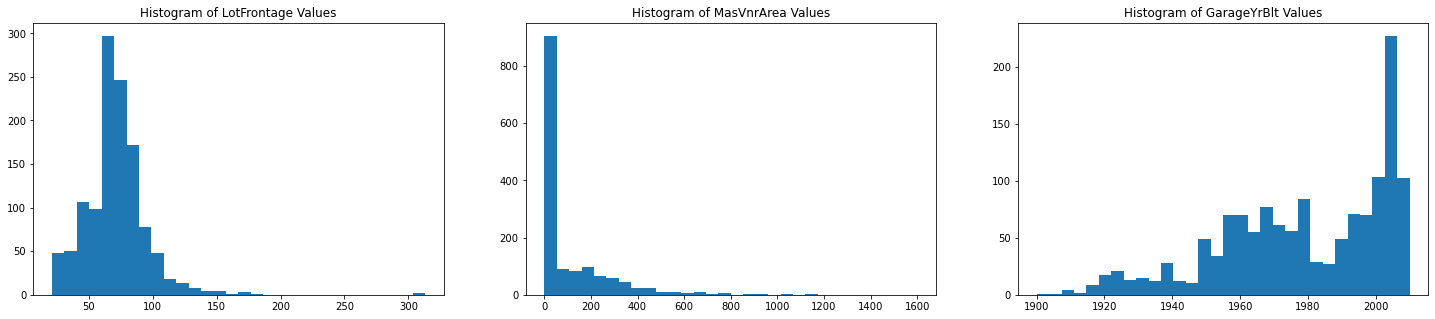

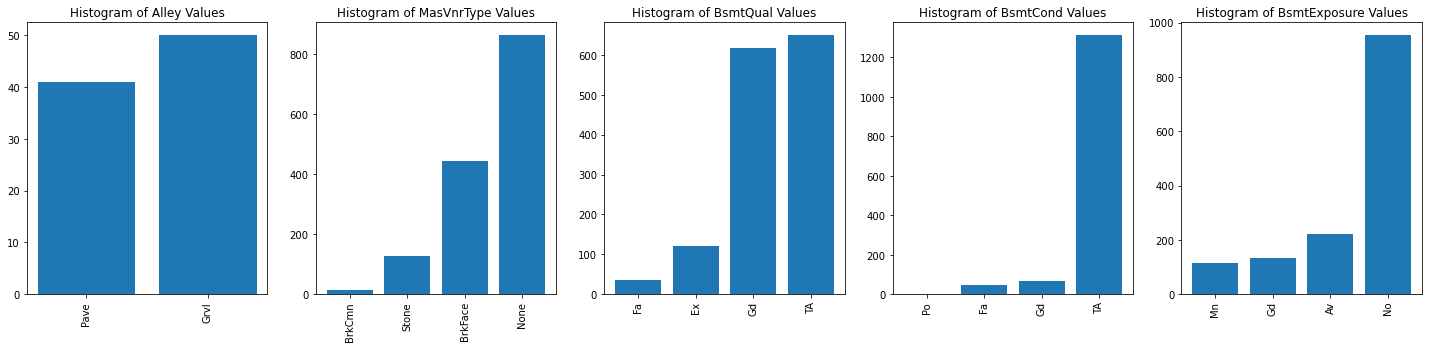

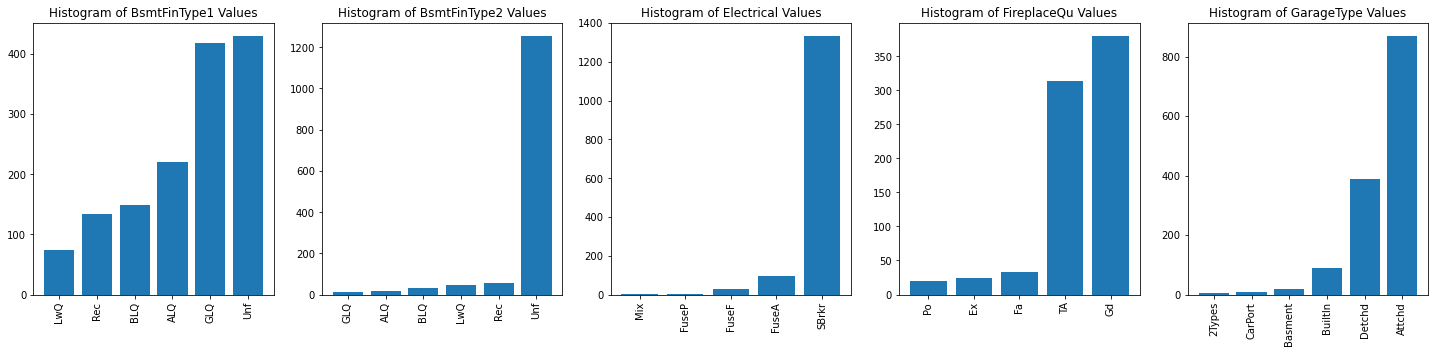

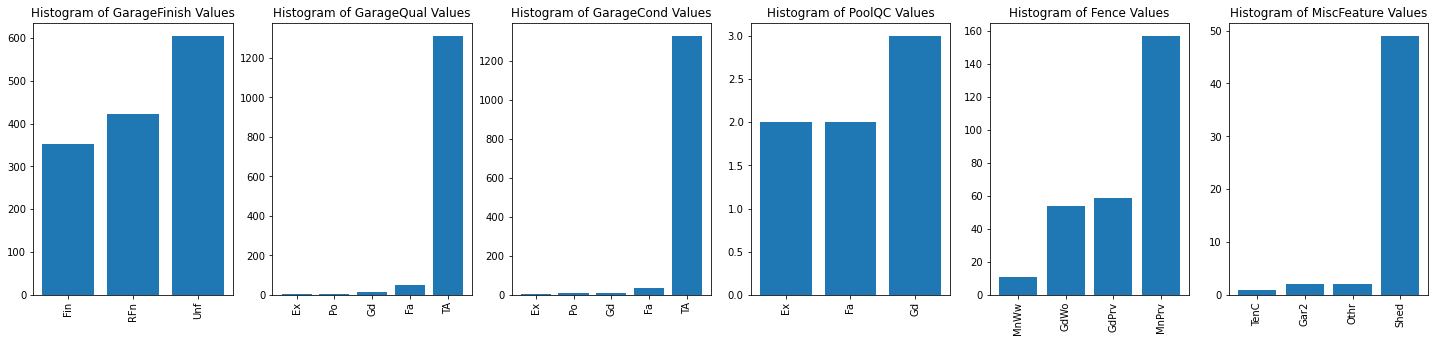

In [62]:
# We generate histograms for the 19 features that contain null values to get a better sense of their distributions.

# This first segment is for continous variables
chart_gen('hist', 30, 3, train, ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])
   
# This second segment are for categorical variables
chart_gen('bar', 0, 5, train, ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure'])

chart_gen('bar', 0, 5, train, ['BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType'])

chart_gen('bar', 0, 6, train, ['GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])

In [32]:
# Investigate outliers

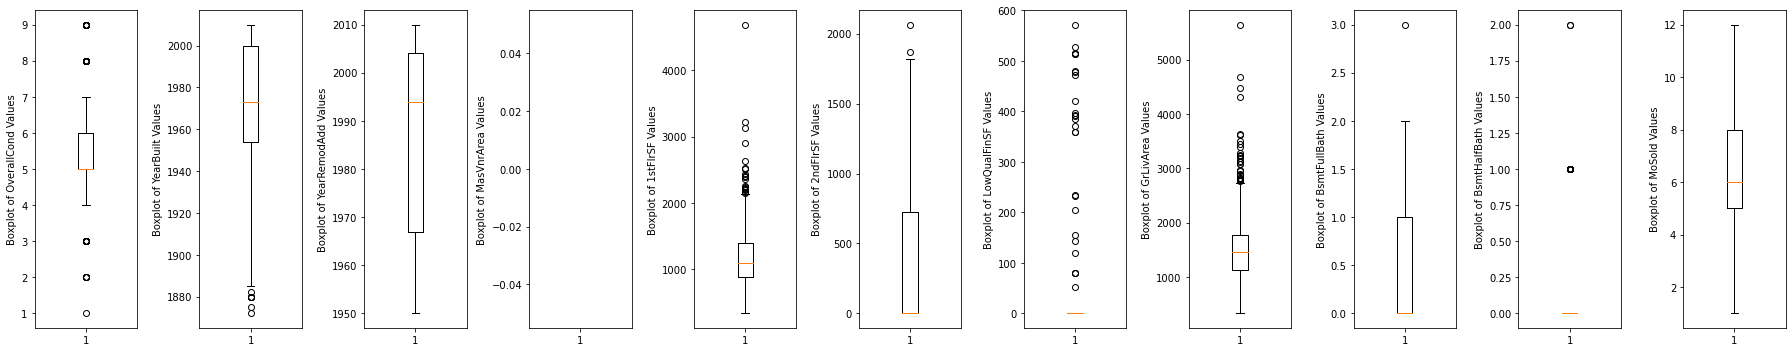

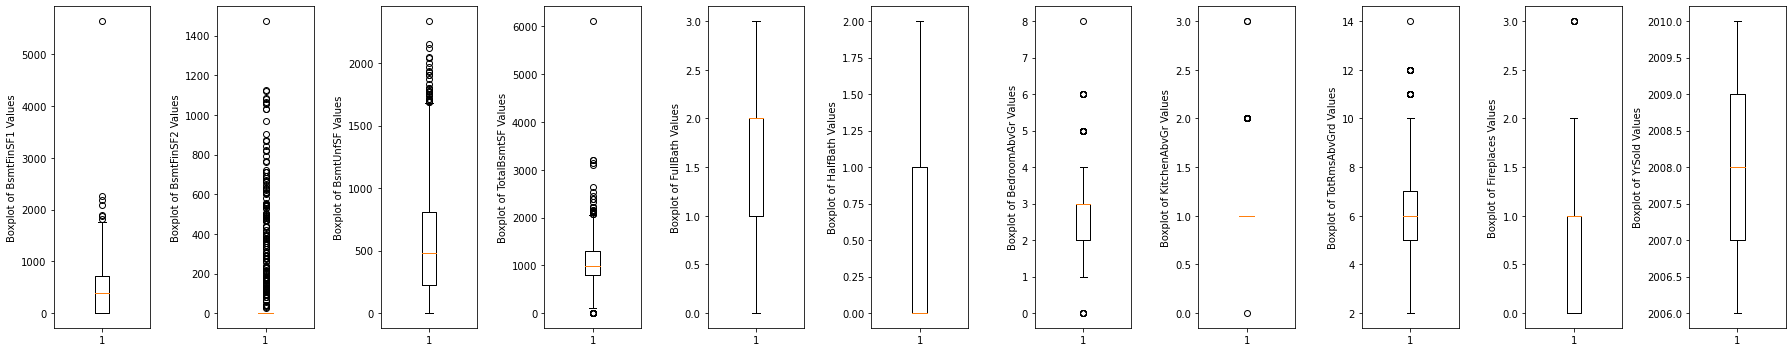

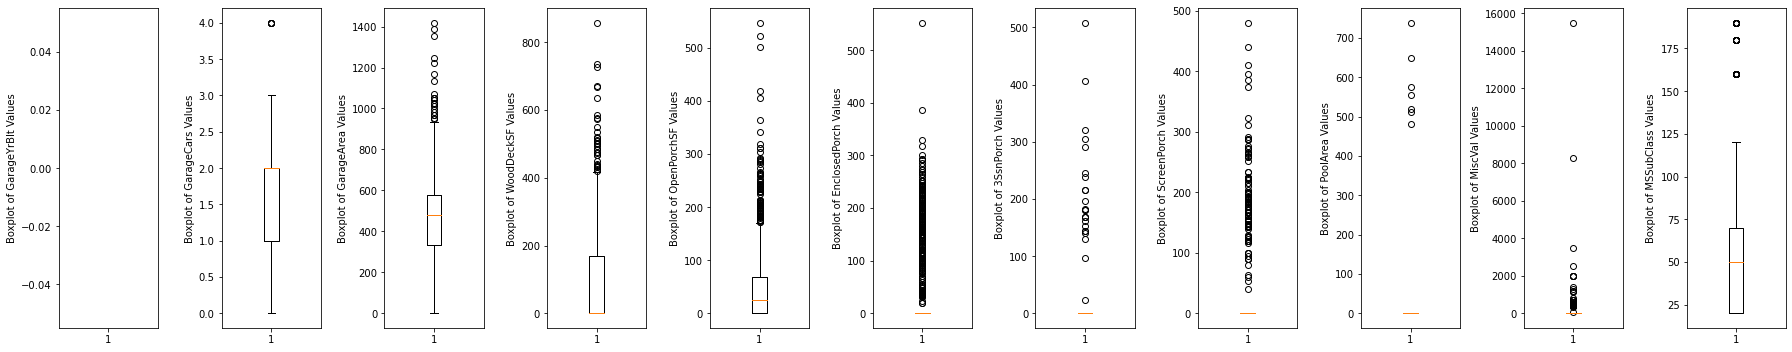

In [33]:
# First we generate box plots of numerical features

chart_gen('box', 0, 11, train, ['OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                                'BsmtFullBath', 'BsmtHalfBath', 'MoSold'])
chart_gen('box', 0, 11, train, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                                'TotRmsAbvGrd', 'Fireplaces', 'YrSold'])
chart_gen('box', 0, 11, train, ['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                                'PoolArea', 'MiscVal', 'MSSubClass'])

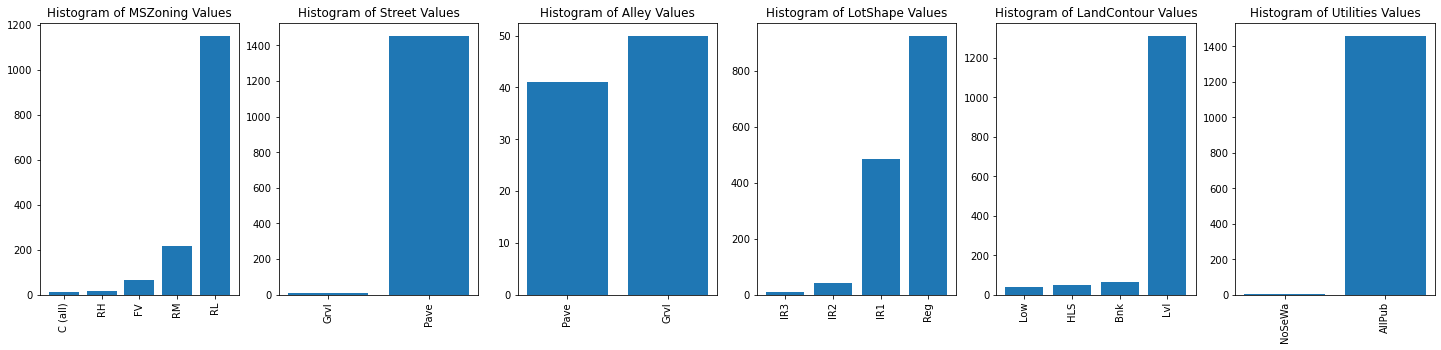

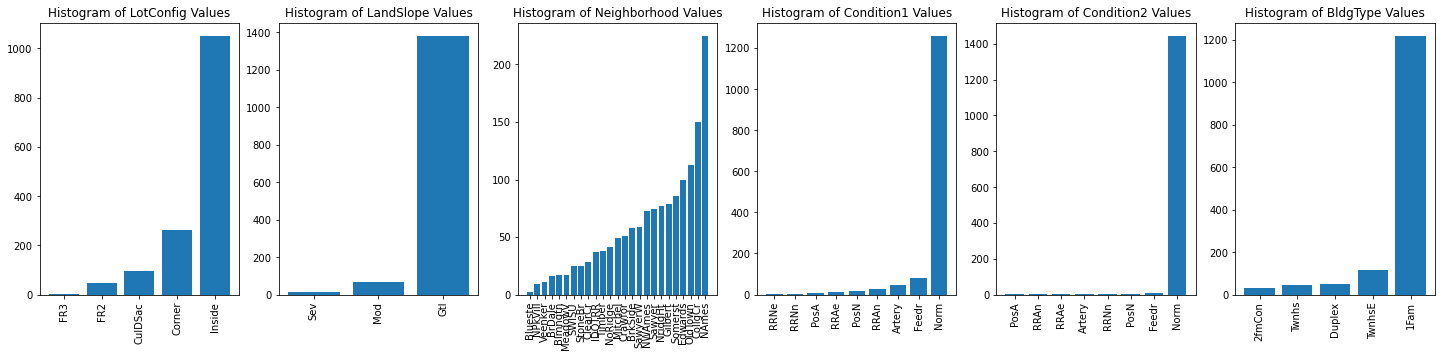

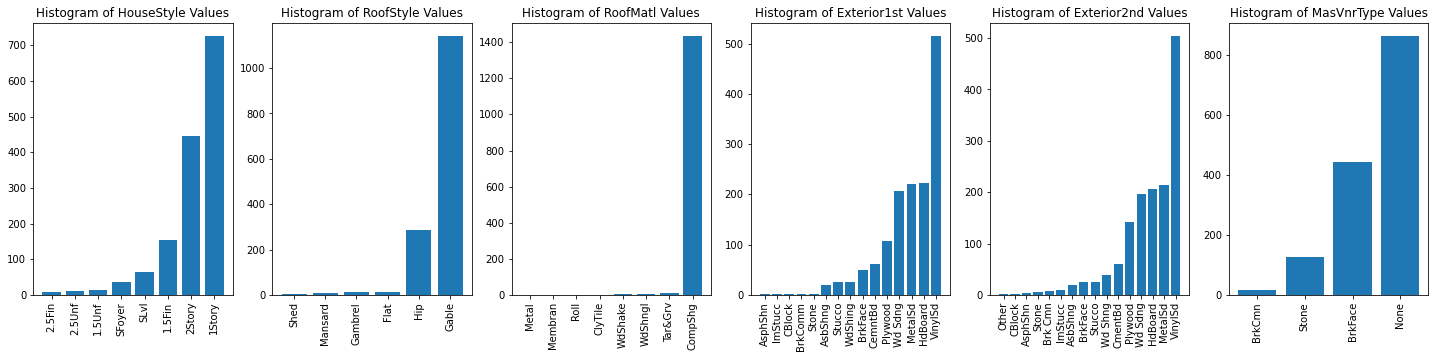

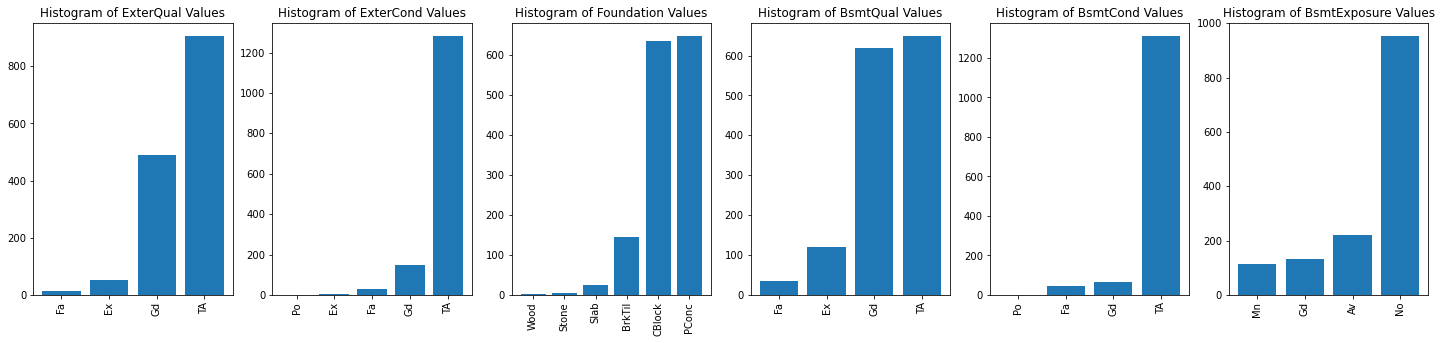

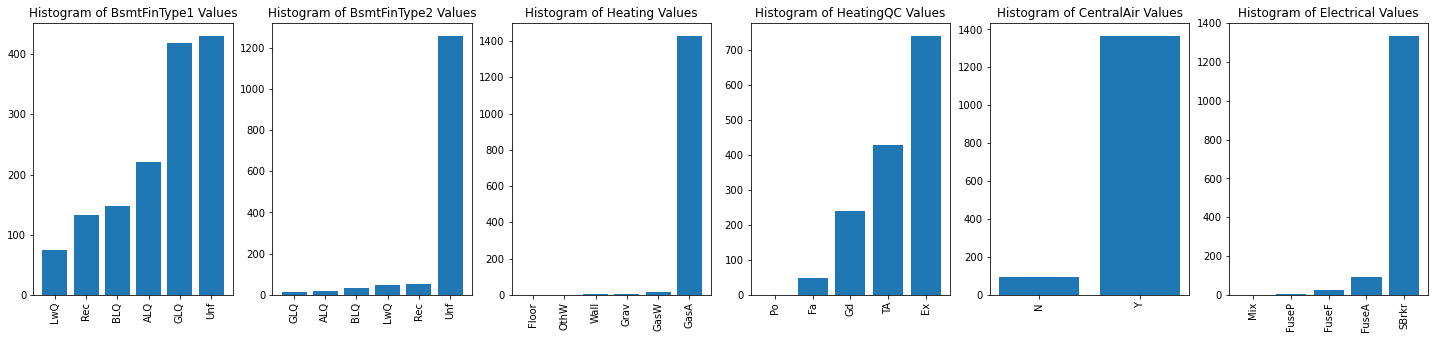

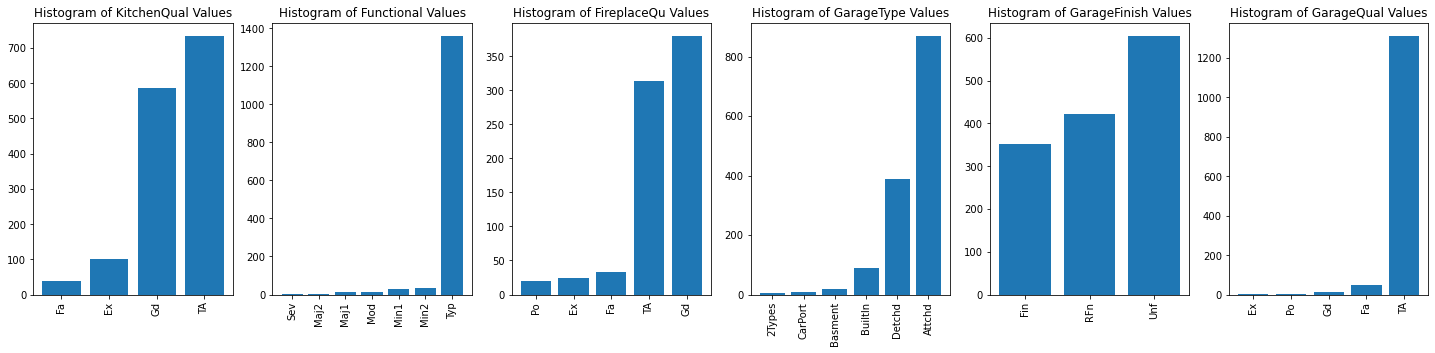

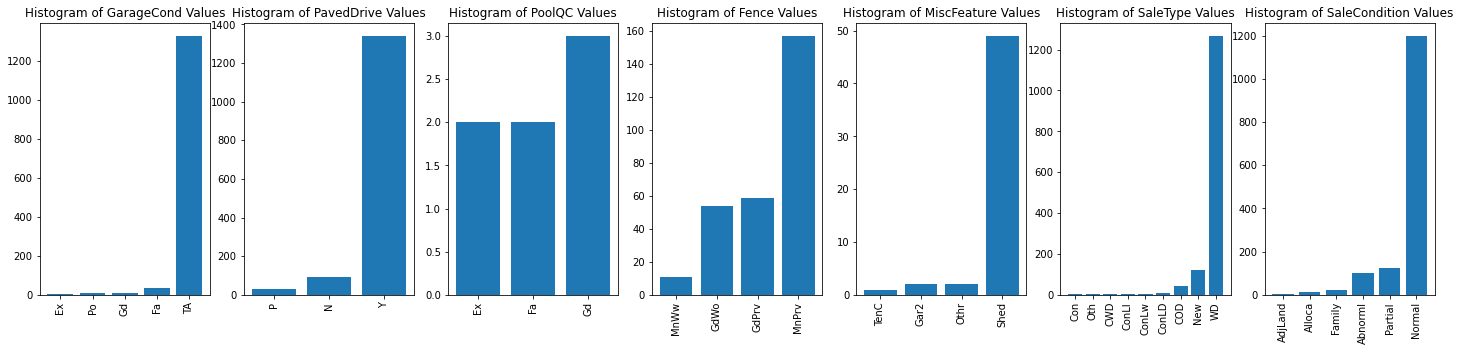

In [34]:
# Second we generate histograms of categorical variables to see if there are any categories that have few values (potential miscodings)

chart_gen('bar', 0, 6, train, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities'])
chart_gen('bar', 0, 6, train, ['LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType'])
chart_gen('bar', 0, 6, train, ['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType'])
chart_gen('bar', 0, 6, train, ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure'])
chart_gen('bar', 0, 6, train, ['BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'])
chart_gen('bar', 0, 6, train, ['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual'])
chart_gen('bar', 0, 7, train, ['GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'])

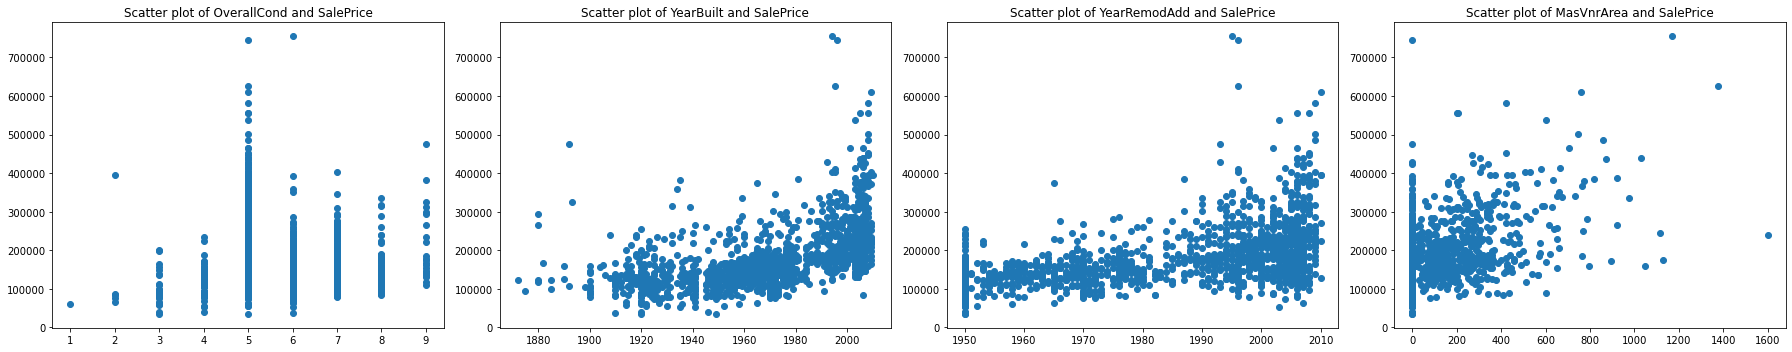

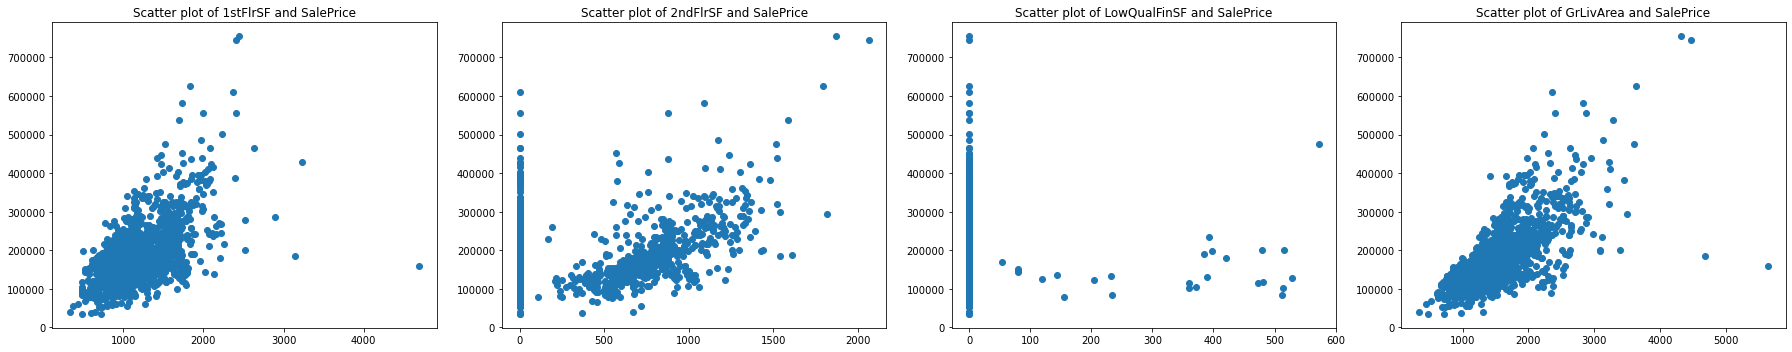

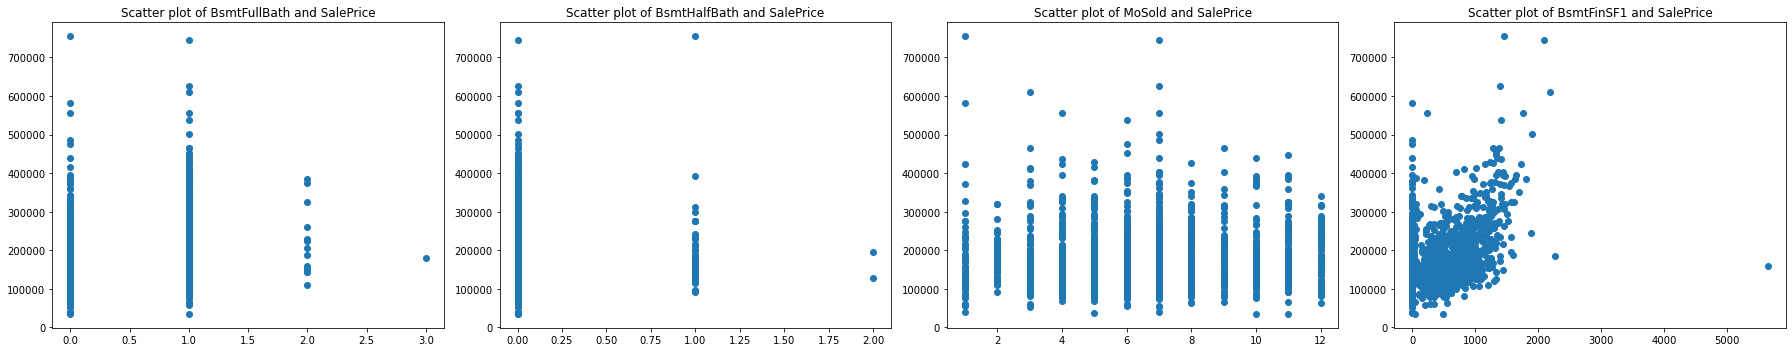

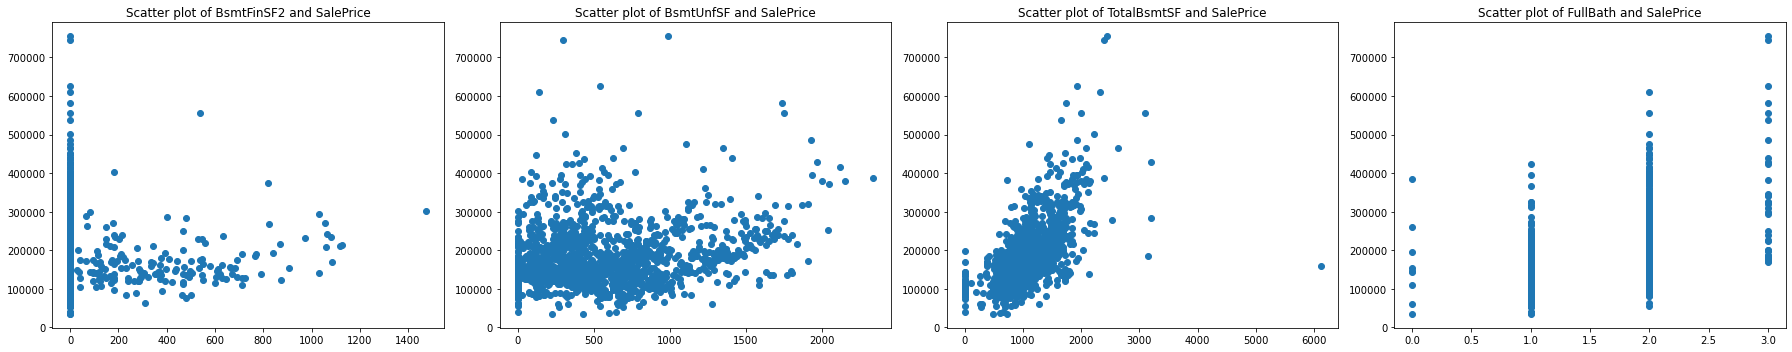

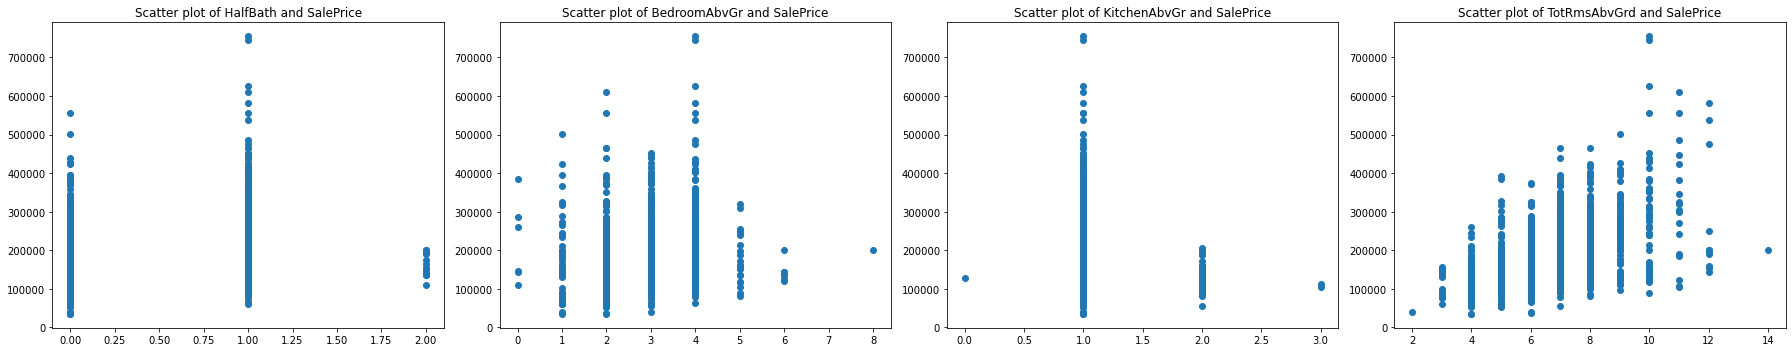

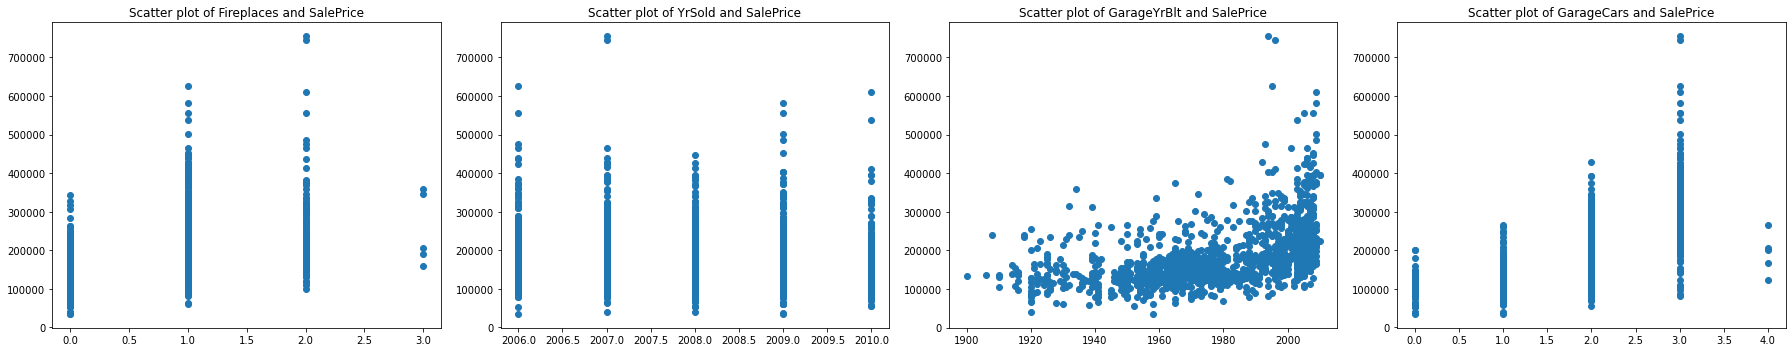

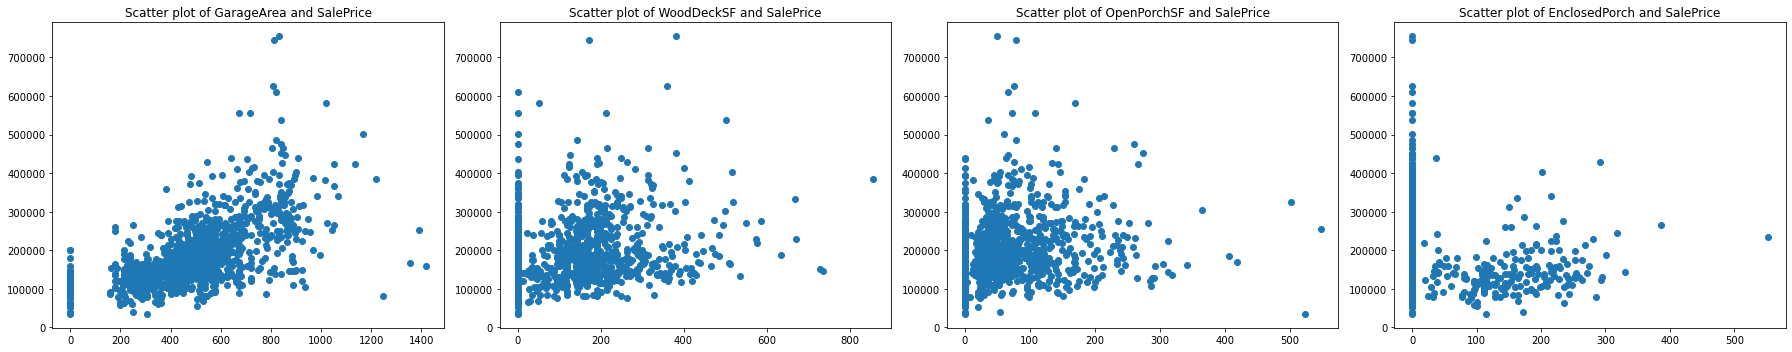

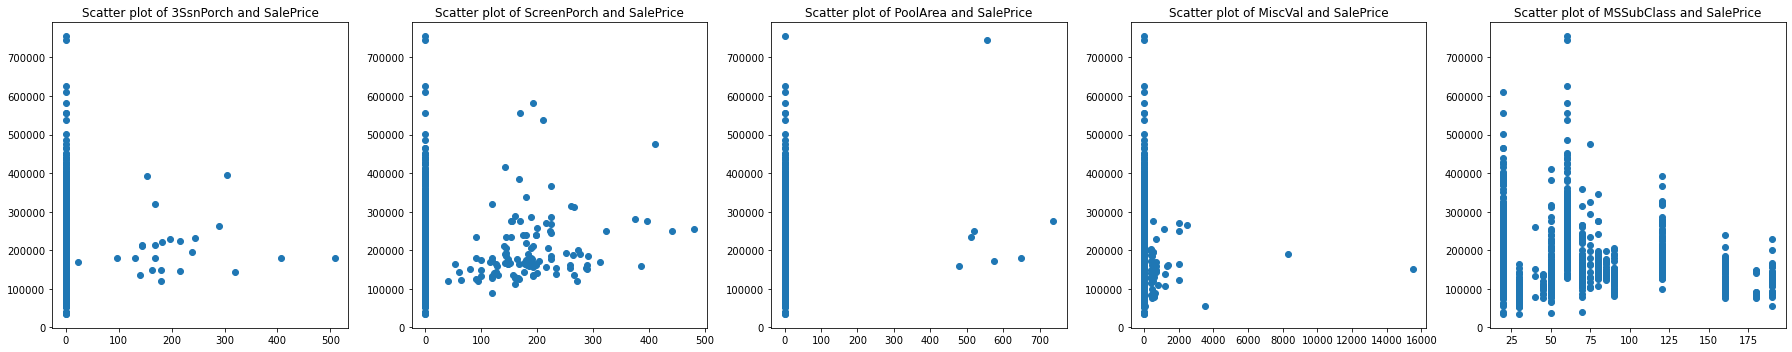

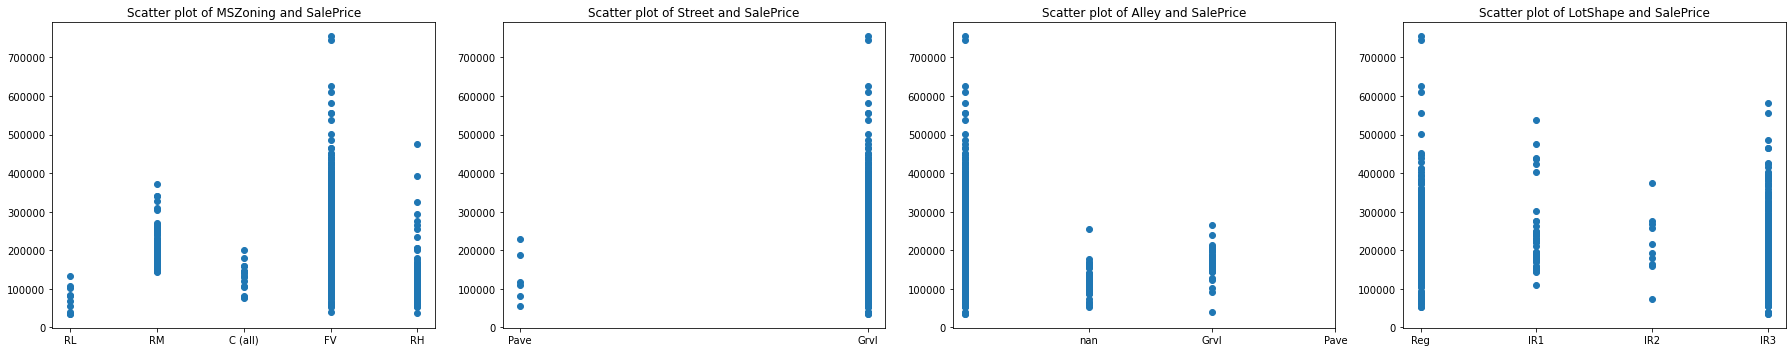

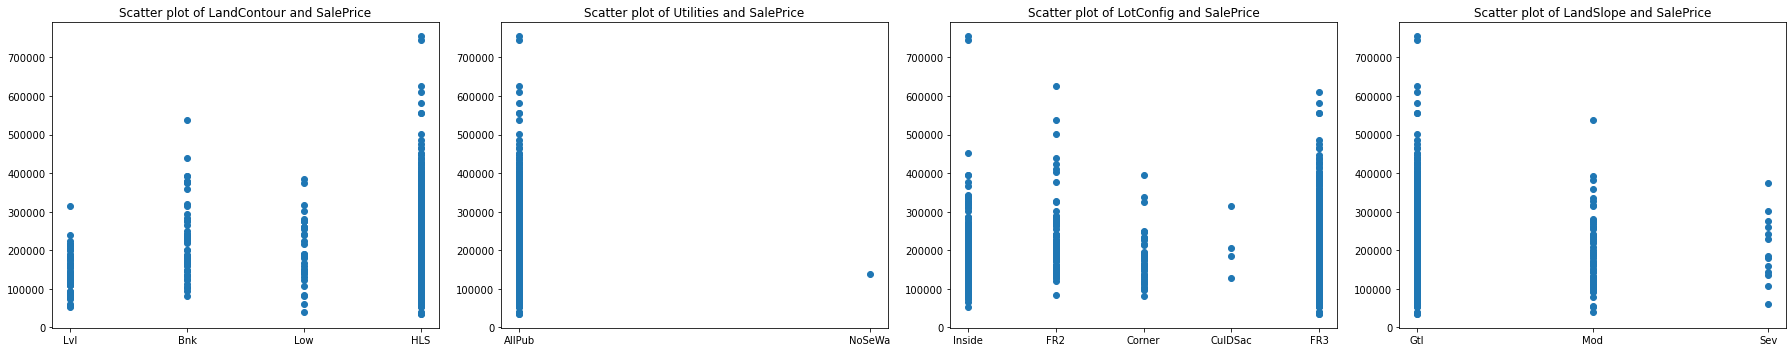

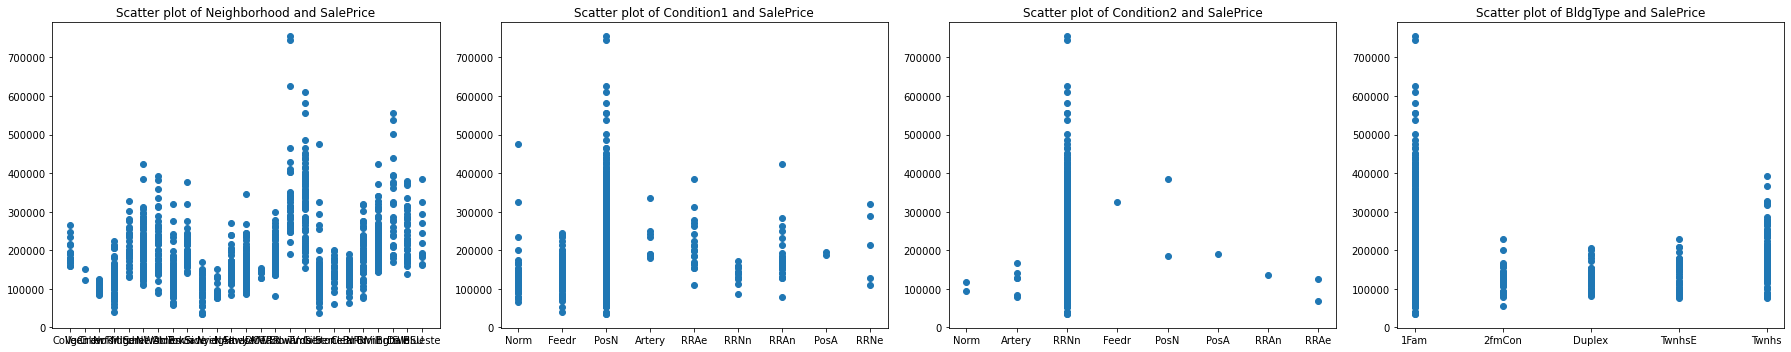

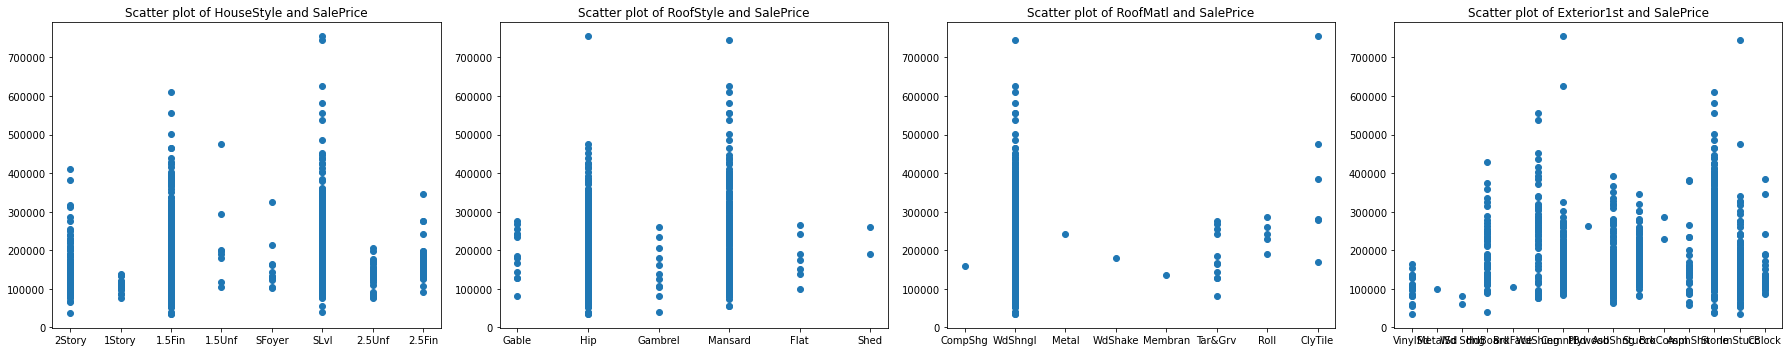

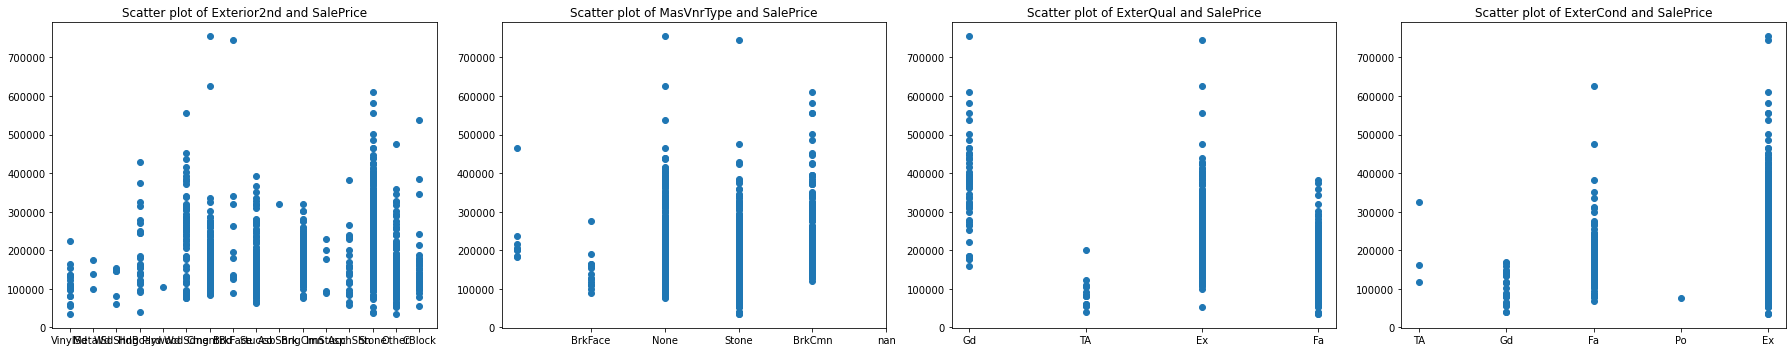

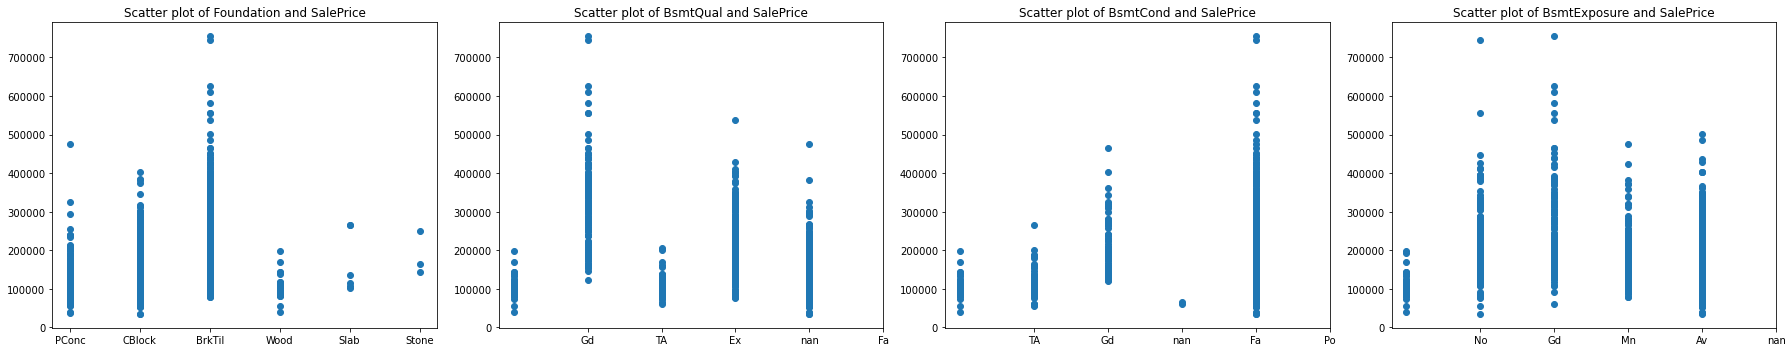

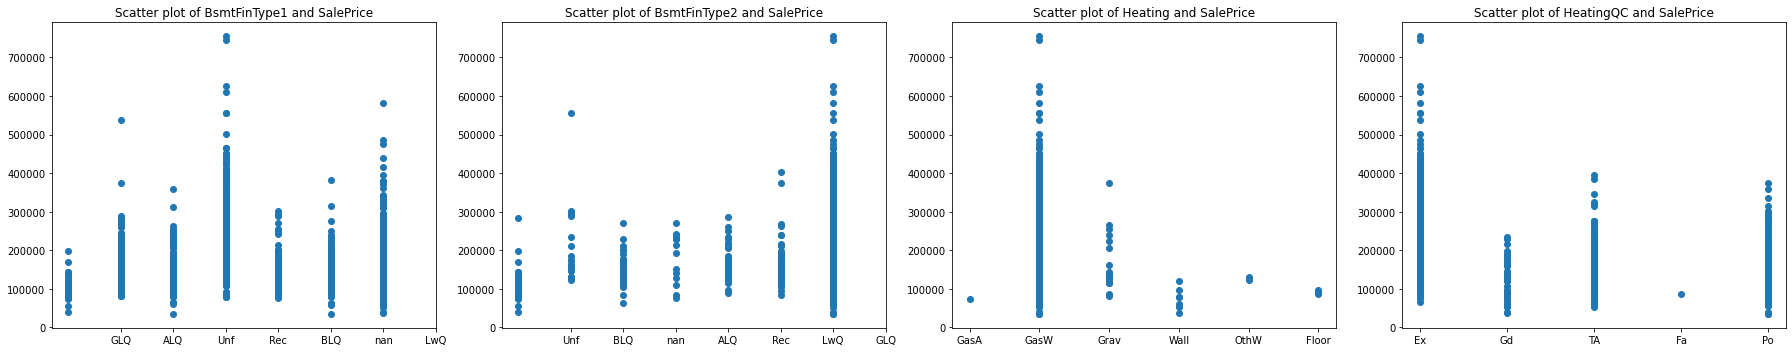

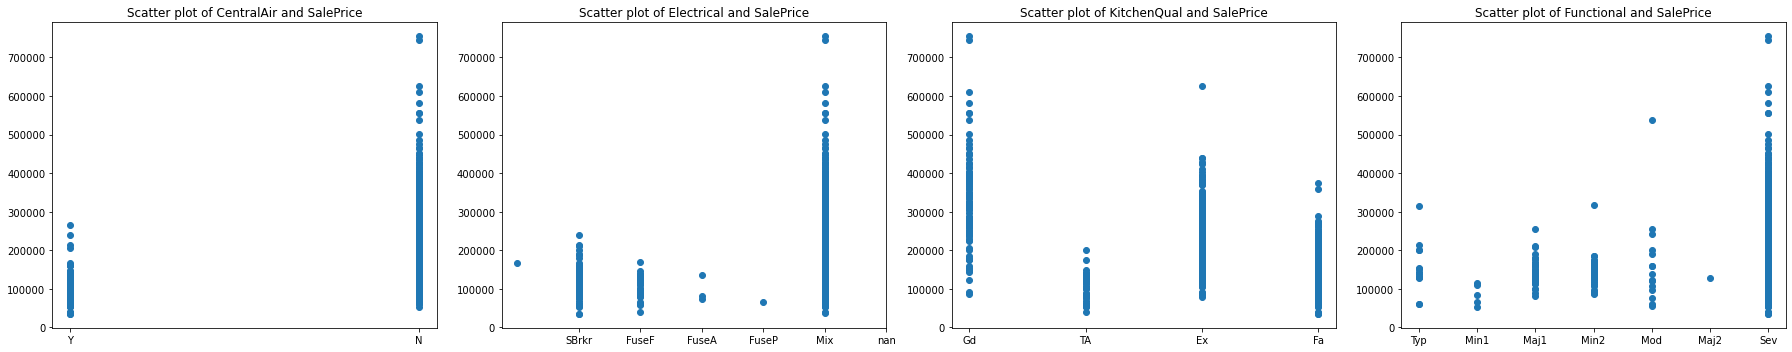

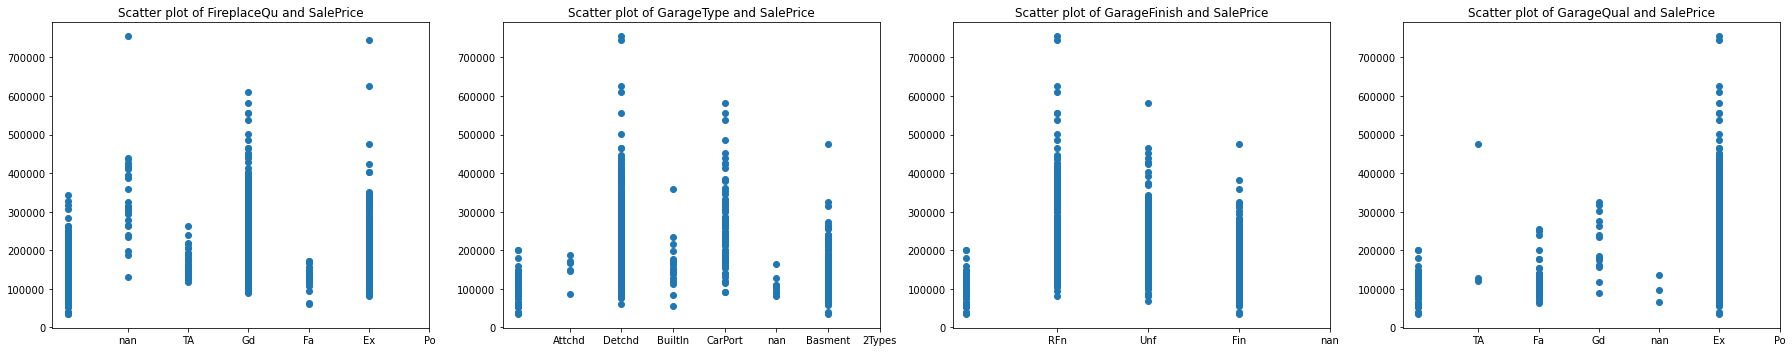

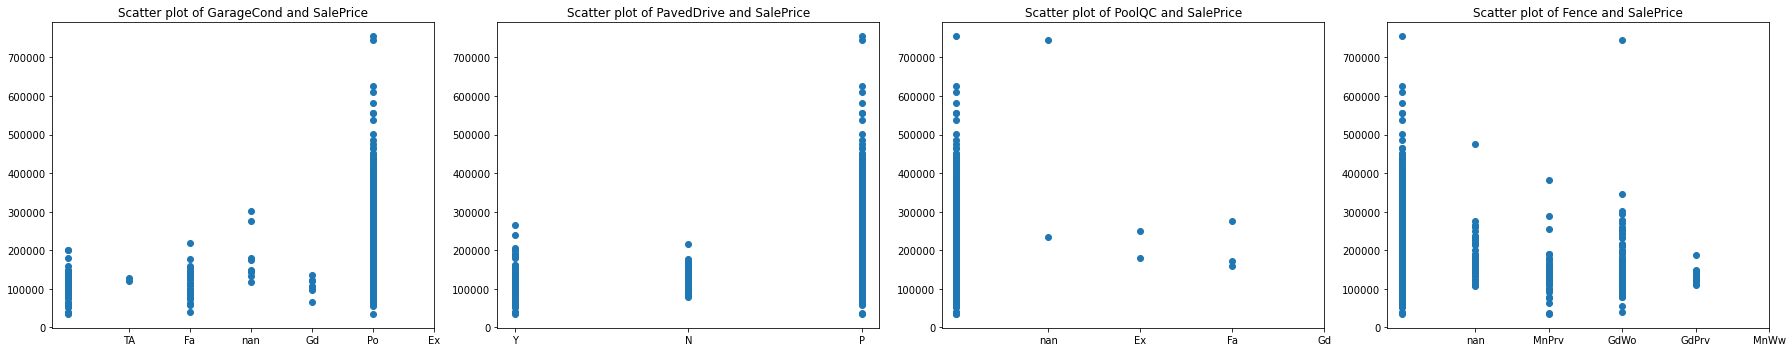

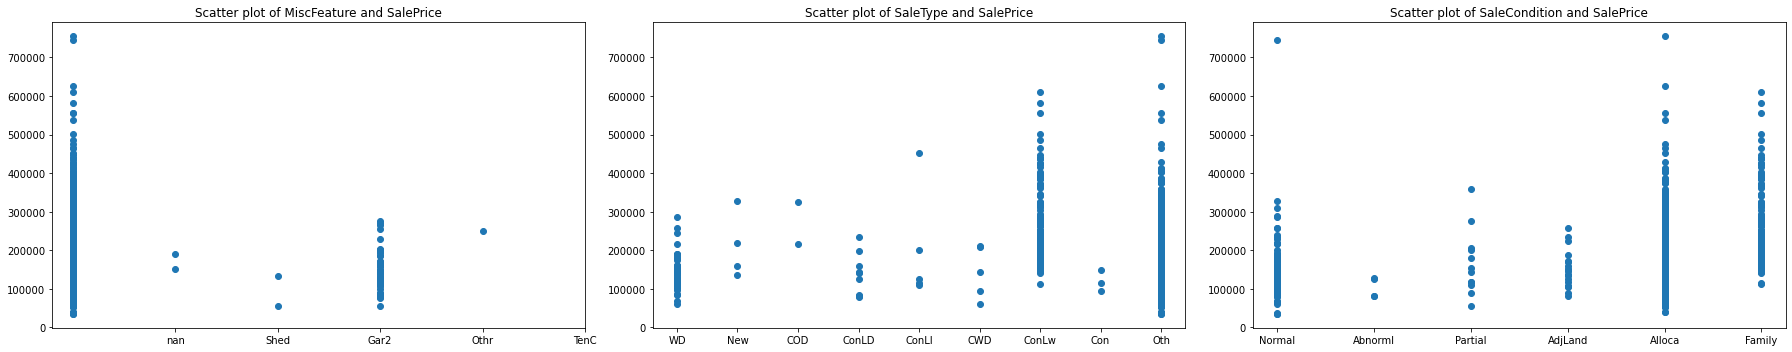

In [35]:
# Since our target feature to estimate is SalePrice, I check for outliers using a scatter plot with salePrice as the y axis and independent 
# variables on the x axis.

chart_gen('scatter', 0, 4, train, ['OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea'], 'SalePrice')
chart_gen('scatter', 0, 4, train, ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], 'SalePrice')
chart_gen('scatter', 0, 4, train, ['BsmtFullBath', 'BsmtHalfBath', 'MoSold', 'BsmtFinSF1'], 'SalePrice')
chart_gen('scatter', 0, 4, train, ['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FullBath'], 'SalePrice')
chart_gen('scatter', 0, 4, train, ['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'], 'SalePrice')
chart_gen('scatter', 0, 4, train, ['Fireplaces', 'YrSold', 'GarageYrBlt', 'GarageCars'], 'SalePrice')
chart_gen('scatter', 0, 4, train, ['GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], 'SalePrice')
chart_gen('scatter', 0, 5, train, ['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MSSubClass'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['MSZoning', 'Street', 'Alley', 'LotShape'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['LandContour', 'Utilities', 'LotConfig', 'LandSlope'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['Neighborhood', 'Condition1', 'Condition2', 'BldgType'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['CentralAir', 'Electrical', 'KitchenQual', 'Functional'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual'], 'SalePrice')
chart_gen('scatter-string', 0, 4, train, ['GarageCond', 'PavedDrive', 'PoolQC', 'Fence'], 'SalePrice')
chart_gen('scatter-string', 0, 3, train, ['MiscFeature', 'SaleType', 'SaleCondition'], 'SalePrice')


In [36]:
# Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the 
# relationships.

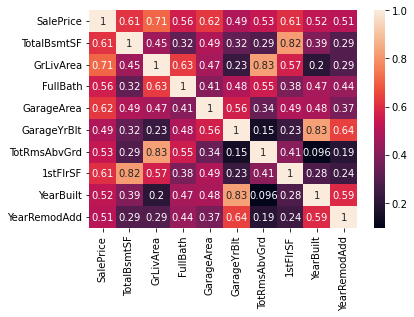

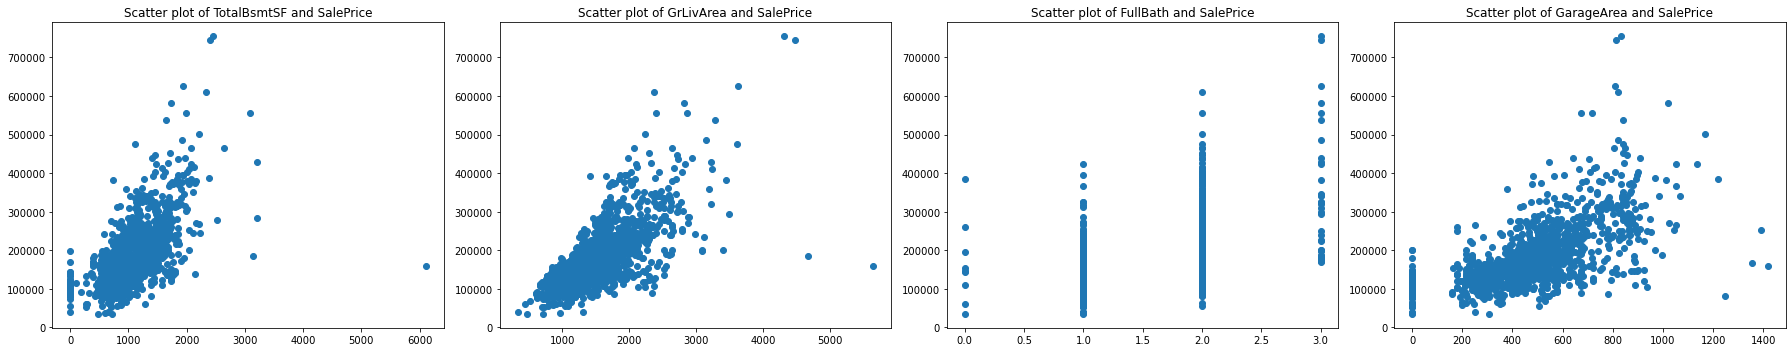

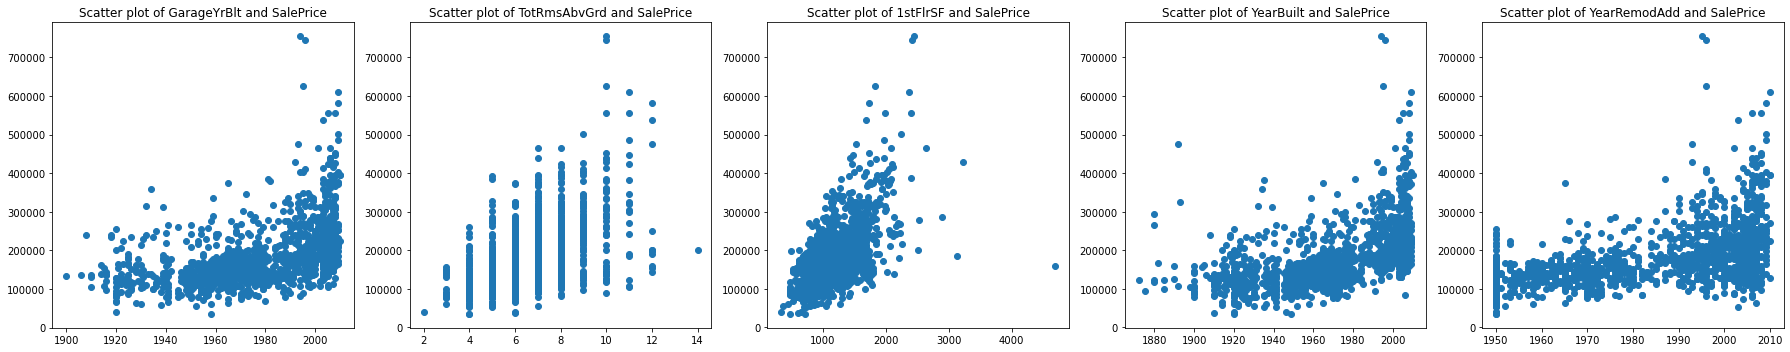

In [37]:
# When we look at the scatter plots above that are examining for outliers of independent variables plotted against the dependent variables, 
# several show strong visual correlations.totalBsmtSF, GrLivArea, fullbath, garageArea, garageYrBlt, totRmsAbvGrd, 1stflrSF, YearBuilt, and 
# YearRemodAdd all show strong positive correlations with salesprice. However, it is likely some of these variables are tightly correlated and 
# we should only pick three variables that are not tightly correlated since they are likely providing different explanitory power. 

explanitory = train[['SalePrice', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'YearBuilt', 
                     'YearRemodAdd']]

sn.heatmap(explanitory.corr(), annot=True)
plt.show()

chart_gen('scatter', 0, 4, train, ['TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea'], 'SalePrice')
chart_gen('scatter', 0, 5, train, ['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'YearBuilt', 'YearRemodAdd'], 'SalePrice')

# I decide to go with GrLivArea, GarageArea, and FullBath. I don't go with 1stFlrSF or TotalBsmtSF, since both have a .83 correlation to GrLivArea 
# and likely are explaining the same variance. I additionally, don't go with FullBath since it has a correlation of .63 to GrLivArea. Instead, I go 
# with YearBuilt which has the next highest correlation with SalePrice. 

In [38]:
# Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

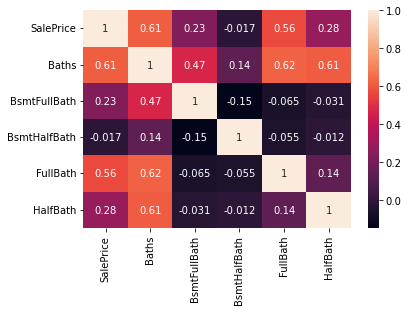

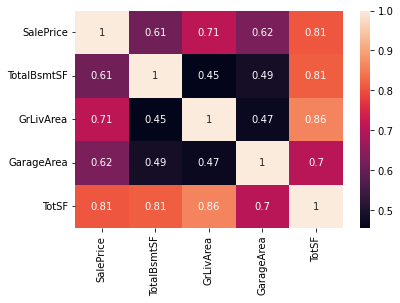

In [44]:
# Create a single feature that captures all the bathrooms in a house. Most home buyers think of 2.5 baths not 2 full baths and 1 half bath.
train['Baths'] = train['BsmtFullBath'] + train['BsmtHalfBath'] + train['FullBath'] + train['HalfBath']

sn.heatmap(train[['SalePrice', 'Baths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].corr(), annot=True)
plt.show()

# Create a feature with all square footage in the house plus garage. Most buyers look at aggregate square footage.
train['TotSF'] = train['TotalBsmtSF'] + train['GrLivArea'] + train['GarageArea']

sn.heatmap(train[['SalePrice', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'TotSF']].corr(), annot=True)
plt.show()

In [40]:
# Using the dependent variable, perform both min-max and standard scaling in Python.

In [41]:
# Now that we are scaling our dataset, we need all our variables to be numeric. Thus, any string categorical variables will need to be transformed 
# into dummy variables
train_dummies = pd.get_dummies(train)

In [42]:
# Min-max scaling
scale_1 = MinMaxScaler()
train_min_max = scale_1.fit_transform(train_dummies)

# Standard scaling
scale_2 = StandardScaler()
train_standardized = scale_2.fit_transform(train_dummies)

# Show how the dataset values have changed
print('Original')
print(train_dummies.head())
print('Min-Max')
print(train_min_max)
print('Standardized')
print(train_standardized)

Original
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...               0             0   
1          1976         0.0         978  ...               0             0   
2          2002       162.0         486  ...               0             0   
3          1970         0.0         216  ...               0             0   
4          2000       350.0         655  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleConditi